# Introduction

We are curious what fraction of a library is filled with spikes?

In [1]:
import os
from glob import glob
import numpy
import sys
import pandas

In [2]:
%matplotlib inline

In [3]:
ROOT=os.path.expanduser("~diane/proj/encode3-curation")
if ROOT not in sys.path:
    sys.path.append(ROOT)

In [4]:
experiment_qc = pandas.read_csv(os.path.join(ROOT, 'compare-mad', 'experiment-mad-qc.csv'))

In [5]:
wold = glob(os.path.expanduser('~/public_html/compare-mad/wold_gene_quantifications/*_tpms.csv'))
len(wold)

95

In [6]:
gingeras = glob(os.path.expanduser('~/public_html/compare-mad/gingeras_fpkms/*_tpms.csv'))
len(gingeras)

142

In [7]:
def make_library_gene_median(experiments):
    for pathname in experiments:
        path, filename = os.path.split(pathname)
        accession = filename.split('_')[0]
        data = pandas.read_csv(pathname, index_col=0, header=0)
        logdata = numpy.log2(data)
        A = logdata.sum(axis=1) / 2.0
        
        gencode_rows = [ x.startswith('ENS') for x in data.index]
        gene_median = data[gencode_rows][A > 0].median()
        for name in gene_median.index:
            yield (accession, name, gene_median[name])

In [8]:
gingeras_median = pandas.DataFrame(make_library_gene_median(gingeras), columns=['experiment', 'library', 'median'])
gingeras_median.to_csv(os.path.expanduser('~/public_html/compare-mad/gingeras_fpkms/gingeras-median.csv'),
                 index=False)

/usr/lib/python3/dist-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [9]:
gingeras_median

,experiment,library,median
0,ENCSR000AAH,ENCLB014ZZZ,1.960
1,ENCSR000AAH,ENCLB015ZZZ,3.050
2,ENCSR000BYS,ENCLB555AYY,9.290
3,ENCSR000BYS,ENCLB555AYX,10.240
4,ENCSR000CUG,ENCLB555ARM,5.050
5,ENCSR000CUG,ENCLB555ARL,1.410
6,ENCSR420NLC,ENCLB978NNR,6.025
7,ENCSR420NLC,ENCLB550IUC,8.060
8,ENCSR000AFN,ENCLB211ZZZ,2.980
9,ENCSR000AFN,ENCLB212ZZZ,4.900


# Gingeras Median

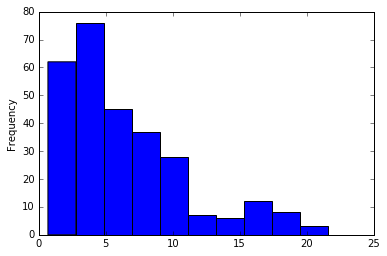

In [10]:
gingeras_median['median'].plot(kind='hist')

In [11]:
wold_median = pandas.DataFrame(make_library_gene_median(wold), columns=['experiment', 'library', 'median'])
wold_median.to_csv(os.path.expanduser('~/public_html/compare-mad/wold_gene_quantifications/wold-median.csv'),
                 index=False)

/usr/lib/python3/dist-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


# Wold Median

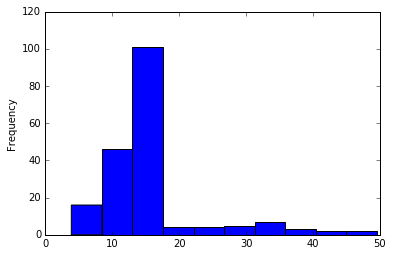

In [12]:
wold_median['median'].plot(kind='hist')

# Gingeras MAD vs median

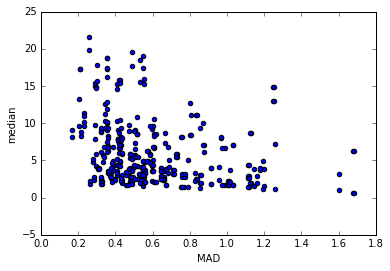

In [13]:
_ = pandas.merge(
    experiment_qc[['experiment', 'MAD']], 
    gingeras_median[['experiment', 'median']],
    on='experiment', how='inner').plot('MAD', 'median', kind='scatter')

# Wold MAD vs median

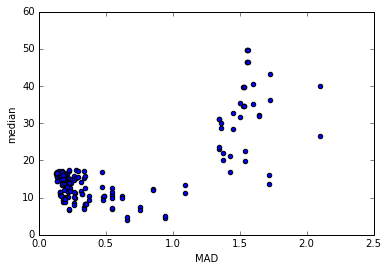

In [15]:
_ = pandas.merge(
    experiment_qc[['experiment', 'MAD']], 
    wold_median[['experiment', 'median']],
    on='experiment', how='inner').plot('MAD', 'median', kind='scatter')